# PISA 2012 Data Exploration
## by Nadine Amin

## Preliminary Wrangling

> PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It focuses on examining how well prepared the students are for life beyond school.

> Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

In [2]:
# Import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# Load the dataset and read the first few lines

df = pd.read_csv('pisa2012.csv', encoding = "ISO-8859-1")
df.head()

C:\Users\asabr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [4]:
df.shape

(485490, 636)

In [5]:
# Drop the first column because it's unnecessary

df.drop(df.columns[0], axis = 1, inplace = True)
df.head()

,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,9,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,8,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,10,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [6]:
# Since there are many columns that can't be viewed by using "df.info()", I went through the dictionary file "pisadict2012.csv"
# to choose the columns of interest, store them in a new dataset, and drop the rest of the columns

df_new = df.iloc[:, np.r_[0, 9:12, 26, 31, 32, 37, 38, 60:63, 65, 140, 178, 192:194, 196, 448, 500:505, 540:550]]
df_new.head()

,CNT,ST03Q01,ST03Q02,ST04Q01,ST13Q01,ST15Q01,ST17Q01,ST19Q01,ST20Q01,ST27Q01,...,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
0,Albania,2,1996,Female,<ISCED level 3A>,"Other (e.g. home duties, retired)",<ISCED level 3A>,Working part-time <for pay>,Country of test,Two,...,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877
1,Albania,2,1996,Female,<ISCED level 3A>,Working full-time <for pay>,<ISCED level 3A>,Working full-time <for pay>,Country of test,Three or more,...,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116
2,Albania,9,1996,Female,"<ISCED level 3B, 3C>",Working full-time <for pay>,<ISCED level 3A>,Working full-time <for pay>,Country of test,Three or more,...,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643
3,Albania,8,1996,Female,"<ISCED level 3B, 3C>",Working full-time <for pay>,<ISCED level 3A>,Working full-time <for pay>,Country of test,Three or more,...,547.3630,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573
4,Albania,10,1996,Female,She did not complete <ISCED level 1>,Working part-time <for pay>,"<ISCED level 3B, 3C>",Working part-time <for pay>,Country of test,Two,...,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746


In [129]:
# Check the datatypes of the columns and if any null values exist

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Country                      485490 non-null  object  
 1   Birth_Month                  485374 non-null  float64 
 2   Birth_Year                   485490 non-null  int64   
 3   Gender                       485490 non-null  object  
 4   Mother_Schooling             457979 non-null  category
 5   Mother_Job                   467751 non-null  category
 6   Father_Schooling             443261 non-null  category
 7   Father_Job                   451410 non-null  category
 8   Birth_Country                476363 non-null  object  
 9   No_Cellphones                477079 non-null  category
 10  No_TVs                       476548 non-null  category
 11  No_Computers                 473459 non-null  category
 12  No_Books                     473765 non-null

In [8]:
# Check that there are no duplicates in the data

df_new[df_new.duplicated()]

,CNT,ST03Q01,ST03Q02,ST04Q01,ST13Q01,ST15Q01,ST17Q01,ST19Q01,ST20Q01,ST27Q01,...,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE


There are no duplicates in the data.

I noticed that there are many null values in the dataset, but since the number of rows are huge, these null values could be dropped or ignored when making observations and it won't make a noticeable effect on the results of the analysis.

### What is the structure of your dataset?

> The original dataset consisted of 485,490 rows and 635 columns. Since there are too many rows and columns, I chose the columns of interest and stored them in a new dataframe, consisting of the same number of rows and only 34 columns.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest in the dataset is to discover which factors affect the students' total scores in Maths, Reading and Science.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Many variables will be examined to find which variable(s) affects the students' scores the most. These variables include birth year and month, gender, immigration status, out-of-school study time, teachers' influences, the parents' job status and highest schooling, etc.

> I believe the features that will most influence the students' scores will be how helpful the teachers are, the immigration status, the class size, and the parents' highest schooling. 

Before diving into the univariate, bivariate and multivariate explorations, I will first rename the columns and make sure that the data is clean

In [9]:
# Rename the columns to be more representable:

df_new = df_new.rename(columns={'CNT':'Country', 'ST03Q01':'Birth_Month', 
                                'ST03Q02':'Birth_Year', 'ST04Q01':'Gender', 'ST13Q01':'Mother_Schooling', 
                                'ST15Q01':'Mother_Job', 'ST17Q01':'Father_Schooling', 'ST19Q01':'Father_Job', 
                                'ST20Q01':'Birth_Country', 'ST27Q01':'No_Cellphones', 'ST27Q02':'No_TVs', 
                                'ST27Q03':'No_Computers', 'ST28Q01':'No_Books', 'ST57Q01':'Homework_Study_Time', 
                                'ST72Q01':'Class_Size', 'ST79Q01':'Teacher_Sets_Goals', 
                                'ST79Q02':'Teacher_Encourages_Thinking', 'ST79Q05':'Teacher_Gives_Feedback', 
                                'IMMIG':'Immigration_Status'})

In [130]:
# Check that the column names changed correctly

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Country                      485490 non-null  object  
 1   Birth_Month                  485374 non-null  float64 
 2   Birth_Year                   485490 non-null  int64   
 3   Gender                       485490 non-null  object  
 4   Mother_Schooling             457979 non-null  category
 5   Mother_Job                   467751 non-null  category
 6   Father_Schooling             443261 non-null  category
 7   Father_Job                   451410 non-null  category
 8   Birth_Country                476363 non-null  object  
 9   No_Cellphones                477079 non-null  category
 10  No_TVs                       476548 non-null  category
 11  No_Computers                 473459 non-null  category
 12  No_Books                     473765 non-null

In [11]:
# Check that Country column's format is consistent

df_new.Country.unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
       'Massachusetts (USA)', 'Romania', 'Russian Federation',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'United States of America', 'Vietn

In [12]:
# The Country variable has inconsistent naming. The different states of the US should be changed to "United States of America". 
# "Perm(Russian Federation)" and "Russian Federation" should be changed to "Russia"
# "Hong Kong-China", "Macao-China", "China-Shangai" and "Chinese Taipei" should be changed to "China"

df_new.loc[df_new['Country'].str.contains('USA'), 'Country'] = 'United States of America'
df_new['Country'] = df_new['Country'].replace(['Perm(Russian Federation)', 'Russian Federation'],'Russia')
df_new.loc[df_new['Country'].str.contains('Chin'), 'Country'] = 'China'

In [13]:
# Check that the countries changed correctly

df_new.Country.unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'China', 'Croatia', 'Hungary',
       'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy', 'Jordan',
       'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Latvia', 'Mexico', 'Montenegro', 'Malaysia',
       'Netherlands', 'Norway', 'New Zealand', 'Peru', 'Poland',
       'Portugal', 'Qatar', 'Russia', 'United States of America',
       'Romania', 'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia',
       'Sweden', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay', 'Vietnam'],
      dtype=object)

In [14]:
# Check that all the birth months make sense

df_new['Birth_Month'].unique()

array([ 2,  9,  8, 10,  3,  6,  5,  4,  7,  1, 12, 11, 99], dtype=int64)

In [15]:
# Check the rows with Birth Month 99

df_new[df_new['Birth_Month'] == 99]

,Country,Birth_Month,Birth_Year,Gender,Mother_Schooling,Mother_Job,Father_Schooling,Father_Job,Birth_Country,No_Cellphones,...,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
319609,Mexico,99,1996,Female,<ISCED level 2>,"Other (e.g. home duties, retired)",<ISCED level 2>,Working full-time <for pay>,Country of test,Three or more,...,425.2776,449.9012,517.4176,446.7240,422.1003,372.7527,383.9426,445.4868,383.0101,409.1197
319610,Mexico,99,1996,Male,<ISCED level 3A>,"Other (e.g. home duties, retired)",<ISCED level 2>,Working full-time <for pay>,Country of test,Three or more,...,412.8231,441.6931,432.0697,443.2970,427.2581,481.8538,501.4360,495.8411,487.4487,472.5289
319611,Mexico,99,1996,Female,<ISCED level 2>,"Other (e.g. home duties, retired)",<ISCED level 2>,Working full-time <for pay>,Country of test,Three or more,...,463.4045,495.9712,399.0653,422.1003,442.7524,363.9873,358.3924,312.7005,339.7426,381.7046
319612,Mexico,99,1996,Female,NaN,NaN,<ISCED level 2>,Working full-time <for pay>,Country of test,Three or more,...,379.7636,402.0043,359.1115,370.2319,388.5010,334.5207,405.3898,379.2801,375.5502,389.5375
319613,Mexico,99,1996,Female,<ISCED level 2>,"Other (e.g. home duties, retired)",<ISCED level 2>,Working full-time <for pay>,Country of test,One,...,387.7861,358.3967,353.6308,367.9284,341.7162,457.6091,364.3603,411.9172,450.1492,420.3096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484717,Vietnam,99,1996,Male,<ISCED level 1>,"Other (e.g. home duties, retired)",<ISCED level 1>,"Other (e.g. home duties, retired)",Country of test,Three or more,...,579.1465,563.1076,522.2084,563.9095,511.7831,603.0772,590.0224,541.5330,603.0772,560.1828
484942,Vietnam,99,1996,Female,She did not complete <ISCED level 1>,Working part-time <for pay>,<ISCED level 1>,Working full-time <for pay>,Country of test,Two,...,441.0049,502.1668,444.1822,464.0399,490.2521,442.4095,488.1015,445.2070,450.8019,503.9537
484944,Vietnam,99,1996,Male,She did not complete <ISCED level 1>,Working full-time <for pay>,<ISCED level 1>,Working full-time <for pay>,Country of test,One,...,318.9955,322.2033,318.9955,363.9044,291.7294,383.0101,367.1578,383.0101,356.9004,388.6050
484960,Vietnam,99,1996,Female,<ISCED level 1>,"Other (e.g. home duties, retired)",He did not complete <ISCED level 1>,Working part-time <for pay>,Country of test,Three or more,...,449.9012,453.8727,433.2207,474.5248,403.0369,450.7087,446.9787,439.5188,506.6580,401.2868


In [16]:
# Replace the values of Birth Month = 99 to null

df_new['Birth_Month'] = df_new['Birth_Month'].replace(99, np.nan)

# Check that the Birth Month values changed

df_new['Birth_Month'].unique()

array([ 2.,  9.,  8., 10.,  3.,  6.,  5.,  4.,  7.,  1., 12., 11., nan])

In [17]:
# Check the unique values of the Mother_Job column

df_new['Mother_Job'].unique()

array(['Other (e.g. home duties, retired) ',
       'Working full-time <for pay> ', 'Working part-time <for pay>',
       'Not working, but looking for a job ', nan], dtype=object)

In [18]:
# Check the unique values of the Father_Job column

df_new['Father_Job'].unique()

array(['Working part-time <for pay>', 'Working full-time <for pay> ',
       'Not working, but looking for a job',
       'Other (e.g. home duties, retired) ', nan], dtype=object)

In [19]:
# Simplify the categories of the Mother and Father Jobs columns to "Full-time", "Part-time", "Looking" and "Other"

df_new['Mother_Job'] = df_new['Mother_Job'].replace('Working full-time <for pay> ', 'Full-time')
df_new['Mother_Job'] = df_new['Mother_Job'].replace('Working part-time <for pay>', 'Part-time')
df_new['Mother_Job'] = df_new['Mother_Job'].replace('Not working, but looking for a job ', 'Looking')
df_new['Mother_Job'] = df_new['Mother_Job'].replace('Other (e.g. home duties, retired) ', 'Other')

df_new['Father_Job'] = df_new['Father_Job'].replace('Working full-time <for pay> ', 'Full-time')
df_new['Father_Job'] = df_new['Father_Job'].replace('Working part-time <for pay>', 'Part-time')
df_new['Father_Job'] = df_new['Father_Job'].replace('Not working, but looking for a job', 'Looking')
df_new['Father_Job'] = df_new['Father_Job'].replace('Other (e.g. home duties, retired) ', 'Other')

In [20]:
# Change the Mother and Father Jobs to ordinal data

job_classes = ['Other', 'Looking', 'Part-time', 'Full-time']
jclasses = pd.api.types.CategoricalDtype(ordered = True, categories = job_classes)
j_vars = ['Mother_Job', 'Father_Job']

for i in range(len(j_vars)):
    df_new[j_vars[i]] = df_new[j_vars[i]].astype(jclasses)

In [21]:
# Check that the categories changed

df_new['Mother_Job'].unique()

['Other', 'Full-time', 'Part-time', 'Looking', NaN]
Categories (4, object): ['Other' < 'Looking' < 'Part-time' < 'Full-time']

In [22]:
# Check that the categories changed

df_new['Father_Job'].unique()

['Part-time', 'Full-time', 'Looking', 'Other', NaN]
Categories (4, object): ['Other' < 'Looking' < 'Part-time' < 'Full-time']

In [23]:
# Check the unique values of the Mother_Schooling column

df_new['Mother_Schooling'].unique()

array(['<ISCED level 3A> ', '<ISCED level 3B, 3C> ',
       'She did not complete <ISCED level 1> ', '<ISCED level 2> ',
       '<ISCED level 1> ', nan], dtype=object)

In [24]:
# Check the unique values of the Father_Schooling column

df_new['Father_Schooling'].unique()

array(['<ISCED level 3A> ', '<ISCED level 3B, 3C> ', '<ISCED level 2> ',
       'He did not complete <ISCED level 1> ', nan, '<ISCED level 1> '],
      dtype=object)

In [25]:
# Simplify the categories of the Mother and Father Schooling columns

df_new['Mother_Schooling'] = df_new['Mother_Schooling'].replace('<ISCED level 3A> ', 'Level 3A')
df_new['Mother_Schooling'] = df_new['Mother_Schooling'].replace('<ISCED level 3B, 3C> ', 'Level 3B or 3C')
df_new['Mother_Schooling'] = df_new['Mother_Schooling'].replace('<ISCED level 2> ', 'Level 2')
df_new['Mother_Schooling'] = df_new['Mother_Schooling'].replace('<ISCED level 1> ', 'Level 1')
df_new['Mother_Schooling'] = df_new['Mother_Schooling'].replace('She did not complete <ISCED level 1> ', '< Level 1')

df_new['Father_Schooling'] = df_new['Father_Schooling'].replace('<ISCED level 3A> ', 'Level 3A')
df_new['Father_Schooling'] = df_new['Father_Schooling'].replace('<ISCED level 3B, 3C> ', 'Level 3B or 3C')
df_new['Father_Schooling'] = df_new['Father_Schooling'].replace('<ISCED level 2> ', 'Level 2')
df_new['Father_Schooling'] = df_new['Father_Schooling'].replace('<ISCED level 1> ', 'Level 1')
df_new['Father_Schooling'] = df_new['Father_Schooling'].replace('He did not complete <ISCED level 1> ', '< Level 1')

In [26]:
# Change the Mother and Father Schooling to ordinal data

school_classes = ['< Level 1', 'Level 1', 'Level 2', 'Level 3A', 'Level 3B or 3C']
sclasses = pd.api.types.CategoricalDtype(ordered = True, categories = school_classes)
s_vars = ['Mother_Schooling', 'Father_Schooling']

for i in range(len(s_vars)):
    df_new[s_vars[i]] = df_new[s_vars[i]].astype(sclasses)

In [27]:
# Check that the categories changed

df_new['Mother_Schooling'].unique()

['Level 3A', 'Level 3B or 3C', '< Level 1', 'Level 2', 'Level 1', NaN]
Categories (5, object): ['< Level 1' < 'Level 1' < 'Level 2' < 'Level 3A' < 'Level 3B or 3C']

In [28]:
# Check that the categories changed

df_new['Father_Schooling'].unique()

['Level 3A', 'Level 3B or 3C', 'Level 2', '< Level 1', NaN, 'Level 1']
Categories (5, object): ['< Level 1' < 'Level 1' < 'Level 2' < 'Level 3A' < 'Level 3B or 3C']

In [29]:
# Check the unique values of the No_Cellphones column

df_new['No_Cellphones'].unique()

array(['Two', 'Three or more', 'One', nan, 'None'], dtype=object)

In [30]:
# Check the unique values of the No_TVs column

df_new['No_TVs'].unique()

array(['One', 'Three or more', 'Two', nan, 'None'], dtype=object)

In [31]:
# Check the unique values of the No_Computers column

df_new['No_Computers'].unique()

array(['None', 'Three or more', 'Two', 'One', nan], dtype=object)

In [32]:
# For the number of cellphones, TVs and computers, we can change them to ordinal data

no_classes = ['None', 'One', 'Two', 'Three or more']
nclasses = pd.api.types.CategoricalDtype(ordered = True, categories = no_classes)
no_vars = ['No_Cellphones', 'No_TVs', 'No_Computers']

for i in range(len(no_vars)):
    df_new[no_vars[i]] = df_new[no_vars[i]].astype(nclasses)

In [33]:
# Check that they changed to ordinal data

df_new['No_Computers'].unique()

['None', 'Three or more', 'Two', 'One', NaN]
Categories (4, object): ['None' < 'One' < 'Two' < 'Three or more']

In [34]:
# Check the unique values of the No_Books column

df_new['No_Books'].unique()

array(['0-10 books ', '201-500 books ', 'More than 500 books',
       '11-25 books ', '101-200 books ', '26-100 books ', nan],
      dtype=object)

In [35]:
# For the number of books, we can change the string to be in the format of "0-10", "11-25", etc. and then change
# them to ordinal data

df_new['No_Books'] = df_new['No_Books'].replace('0-10 books ', '0-10')
df_new['No_Books'] = df_new['No_Books'].replace('11-25 books ', '11-25')
df_new['No_Books'] = df_new['No_Books'].replace('26-100 books ', '26-100')
df_new['No_Books'] = df_new['No_Books'].replace('101-200 books ', '101-200')
df_new['No_Books'] = df_new['No_Books'].replace('201-500 books ', '201-500')
df_new['No_Books'] = df_new['No_Books'].replace('More than 500 books', '500+')

book_classes = ['0-10', '11-25', '26-100', '101-200', '201-500', '500+']
bclasses = pd.api.types.CategoricalDtype(ordered = True, categories = book_classes)
df_new['No_Books'] = df_new['No_Books'].astype(bclasses)

In [36]:
# Check that they changed to ordinal data

df_new['No_Books'].unique()

['0-10', '201-500', '500+', '11-25', '101-200', '26-100', NaN]
Categories (6, object): ['0-10' < '11-25' < '26-100' < '101-200' < '201-500' < '500+']

In [37]:
# Check the unique values of the Teacher_Sets_Goals column

df_new['Teacher_Sets_Goals'].unique()

array(['Never or Hardly Ever', nan, 'Some Lessons', 'Every Lesson',
       'Most Lessons'], dtype=object)

In [38]:
# For the teacher's influences (Teacher_Sets_Goals, Teacher_Encourages_Thinking and Assessment_Gives_Feedback),
# we can change them to ordinal data

teach_classes = ['Never or Hardly Ever', 'Some Lessons', 'Most Lessons', 'Every Lesson']
tclasses = pd.api.types.CategoricalDtype(ordered = True, categories = teach_classes)
t_vars = ['Teacher_Sets_Goals', 'Teacher_Encourages_Thinking', 'Teacher_Gives_Feedback']

for i in range(len(t_vars)):
    df_new[t_vars[i]] = df_new[t_vars[i]].astype(tclasses)

In [39]:
# Check that they changed to ordinal data

df_new['Teacher_Gives_Feedback'].unique()

['Most Lessons', NaN, 'Every Lesson', 'Some Lessons', 'Never or Hardly Ever']
Categories (4, object): ['Never or Hardly Ever' < 'Some Lessons' < 'Most Lessons' < 'Every Lesson']

In [40]:
# Now we can get an average of the five assessments for each of the Maths, Reading and Science assessments
# We can also get the total of the three averages and store them in one variable

df_new['Maths_Score'] = (df_new['PV1MATH'] + df_new['PV2MATH'] + df_new['PV3MATH'] + df_new['PV4MATH'] + df_new['PV5MATH']) / 5
df_new['Reading_Score'] = (df_new['PV1READ'] + df_new['PV2READ'] + df_new['PV3READ'] + df_new['PV4READ'] + df_new['PV5READ']) / 5
df_new['Science_Score'] = (df_new['PV1SCIE'] + df_new['PV2SCIE'] + df_new['PV3SCIE'] + df_new['PV4SCIE'] + df_new['PV5SCIE']) / 5
df_new['Total_Score'] = df_new['Maths_Score'] + df_new['Reading_Score'] + df_new['Science_Score']

In [41]:
# Check that the new columns were added correctly

df_new.head()

,Country,Birth_Month,Birth_Year,Gender,Mother_Schooling,Mother_Job,Father_Schooling,Father_Job,Birth_Country,No_Cellphones,...,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,Maths_Score,Reading_Score,Science_Score,Total_Score
0,Albania,2.0,1996,Female,Level 3A,Other,Level 3A,Part-time,Country of test,Two,...,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,366.18634,261.01424,371.91348,999.11406
1,Albania,2.0,1996,Female,Level 3A,Full-time,Level 3A,Full-time,Country of test,Three or more,...,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,470.56396,384.68832,478.12382,1333.37610
2,Albania,9.0,1996,Female,Level 3B or 3C,Full-time,Level 3A,Full-time,Country of test,Three or more,...,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,505.53824,405.18154,486.60946,1397.32924
3,Albania,8.0,1996,Female,Level 3B or 3C,Full-time,Level 3A,Full-time,Country of test,Three or more,...,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573,449.45476,477.46376,453.97240,1380.89092
4,Albania,10.0,1996,Female,< Level 1,Part-time,Level 3B or 3C,Part-time,Country of test,Two,...,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746,385.50398,256.01010,367.15778,1008.67186


In [42]:
# Now we can remove the extra columns 32-46

df_new = df_new.drop(['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 
                          'PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], axis=1)

In [43]:
# Check that the columns were deleted

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Country                      485490 non-null  object  
 1   Birth_Month                  485374 non-null  float64 
 2   Birth_Year                   485490 non-null  int64   
 3   Gender                       485490 non-null  object  
 4   Mother_Schooling             457979 non-null  category
 5   Mother_Job                   467751 non-null  category
 6   Father_Schooling             443261 non-null  category
 7   Father_Job                   451410 non-null  category
 8   Birth_Country                476363 non-null  object  
 9   No_Cellphones                477079 non-null  category
 10  No_TVs                       476548 non-null  category
 11  No_Computers                 473459 non-null  category
 12  No_Books                     473765 non-null

Now that the data is clean and we have the columns we need, it is time to begin the univariate exploration

## Univariate Exploration

We will first take a look at the categorical variables

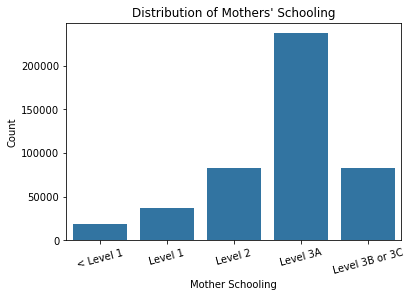

In [51]:
# Plot 1: Bar chart of the mothers' schooling

# Unify the color by storing it into base_color
base_color = sb.color_palette()[0]

sb.countplot(data = df_new, x = 'Mother_Schooling', color = base_color);

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15)

# Set the plot's title and labels
plt.title("Distribution of Mothers' Schooling")
plt.xlabel("Mother Schooling")
plt.ylabel('Count');

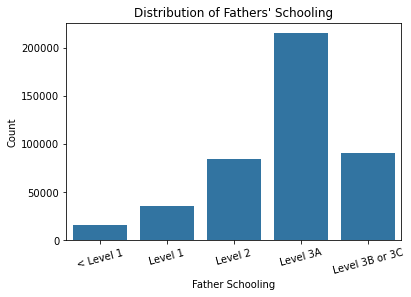

In [52]:
# Plot 2: Bar chart of the fathers' schooling

sb.countplot(data = df_new, x = 'Father_Schooling', color = base_color);

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15)

# Set the plot's title and labels
plt.title("Distribution of Fathers' Schooling")
plt.xlabel("Father Schooling")
plt.ylabel('Count');

As we can see from the first two plots, there isn't a noticeable difference between the fathers' and mothers' schooling. Most of the parents' schooling was level 3A.

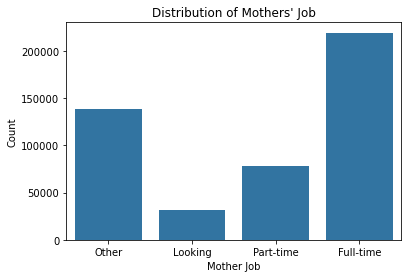

In [53]:
# Plot 3: Bar chart of the mothers' job

sb.countplot(data = df_new, x = 'Mother_Job', color = base_color);

# Set the plot's title and labels
plt.title("Distribution of Mothers' Job")
plt.xlabel("Mother Job")
plt.ylabel('Count');

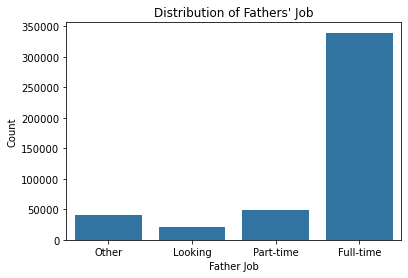

In [54]:
# Plot 4: Bar chart of the fathers' job

sb.countplot(data = df_new, x = 'Father_Job', color = base_color);

# Set the plot's title and labels
plt.title("Distribution of Fathers' Job")
plt.xlabel("Father Job")
plt.ylabel('Count');

From plots 3 and 4, we can see that the majority of mothers had full-time jobs, followed by others (which include home duties and being retired), followed by part-time jobs, and finally followed by searching for a job. However, in the case of fathers, most of them have full-time jobs, and the minority have either part-time jobs, others, or looking for a job.

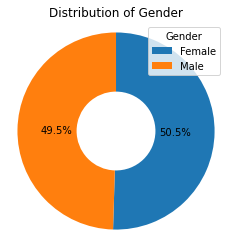

In [134]:
# Plot 5: Donut chart of the gender

plt.pie(df_new['Gender'].value_counts(), startangle = 90, counterclock = False, autopct = '%1.1f%%', wedgeprops = {'width' : 0.6});

# Set the plot's title and legend
plt.title("Distribution of Gender")
plt.legend(['Female', 'Male'], title = 'Gender');

From plot 5, we can see that the female students are only slightly more than male students.

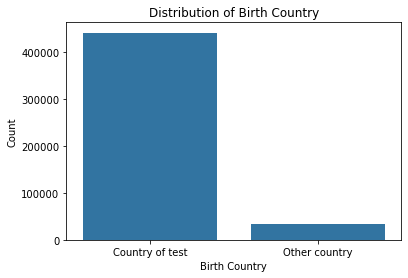

In [56]:
# Plot 6: Bar chart of the birth country

# Get the descending order of the Birth Country column
gen_order = df_new['Birth_Country'].value_counts().index

sb.countplot(data = df_new, x = 'Birth_Country', color = base_color, order = gen_order);

# Set the plot's title and labels
plt.title("Distribution of Birth Country")
plt.xlabel("Birth Country")
plt.ylabel('Count');

We can see from plot 6 that the majority of students were born in the same country as the test was taken

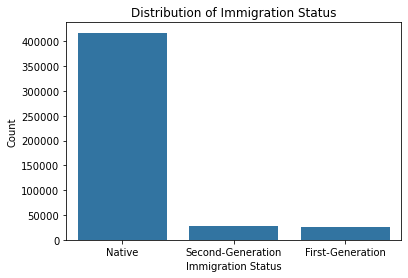

In [57]:
# Plot 7: Bar chart of the immigration status

# Get the descending order of the Immigration Status column
gen_order = df_new['Immigration_Status'].value_counts().index

sb.countplot(data = df_new, x = 'Immigration_Status', color = base_color, order = gen_order);

# Set the plot's title and labels
plt.title("Distribution of Immigration Status")
plt.xlabel("Immigration Status")
plt.ylabel('Count');

From plot 7, we can see that the majority of students are in their native countries

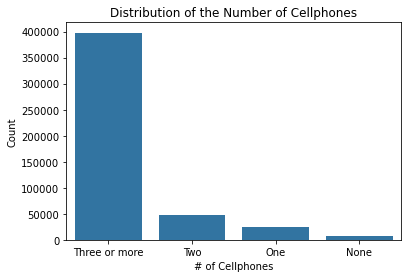

In [58]:
# Plot 8: Bar chart of the number of cellphones

# Get the descending order of the No_Cellphones column
gen_order = df_new['No_Cellphones'].value_counts().index

sb.countplot(data = df_new, x = 'No_Cellphones', color = base_color, order = gen_order);

# Set the plot's title and labels
plt.title("Distribution of the Number of Cellphones")
plt.xlabel("# of Cellphones")
plt.ylabel('Count');

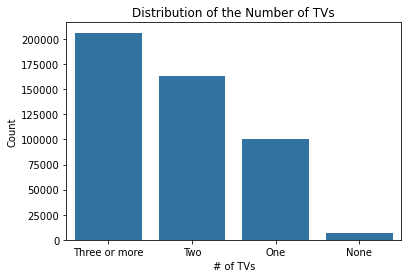

In [59]:
# Plot 9: Bar chart of the number of TVs

# Get the descending order of the No_TVs column
gen_order = df_new['No_TVs'].value_counts().index

sb.countplot(data = df_new, x = 'No_TVs', color=base_color, order=gen_order);

# Set the plot's title and labels
plt.title("Distribution of the Number of TVs")
plt.xlabel("# of TVs")
plt.ylabel('Count');

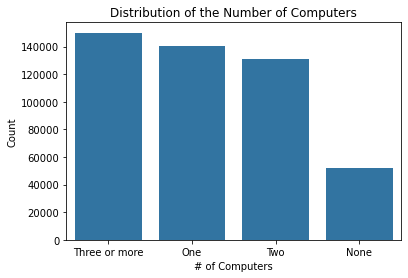

In [60]:
# Plot 10: Bar chart of the number of computers

# Get the descending order of the No_Computers column
gen_order = df_new['No_Computers'].value_counts().index

sb.countplot(data = df_new, x = 'No_Computers', color=base_color, order=gen_order);

# Set the plot's title and labels
plt.title("Distribution of the Number of Computers")
plt.xlabel("# of Computers")
plt.ylabel('Count');

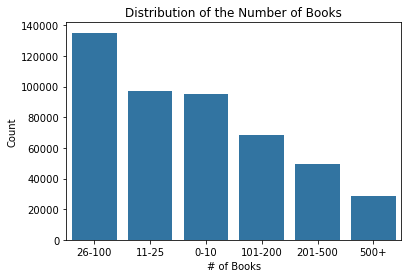

In [61]:
# Plot 11: Bar chart of the number of books

# Get the descending order of the No_Books column
gen_order = df_new['No_Books'].value_counts().index

sb.countplot(data = df_new, x = 'No_Books', color=base_color, order=gen_order);

# Set the plot's title and labels
plt.title("Distribution of the Number of Books")
plt.xlabel("# of Books")
plt.ylabel('Count');

Plots 8-11 illustrated that:

8: Most students have three or more cellphones in their household

9: Most students have three or more televisions

10: Most students have three or more computers

11: Most students have 26-100 books


This shows how important technology devices are for these students. These variables will be examined further in the bivariate and/or multivariate sections of the analysis to see if they had an effect on the students' scores.

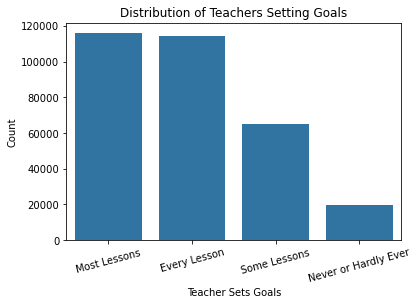

In [62]:
# Plot 12: Bar chart of the teachers setting goals

# Get the descending order of the Teacher_Sets_Goals column
gen_order = df_new['Teacher_Sets_Goals'].value_counts().index
sb.countplot(data = df_new, x = 'Teacher_Sets_Goals', color=base_color, order=gen_order);

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15)

# Set the plot's title and labels
plt.title("Distribution of Teachers Setting Goals")
plt.xlabel("Teacher Sets Goals")
plt.ylabel('Count');

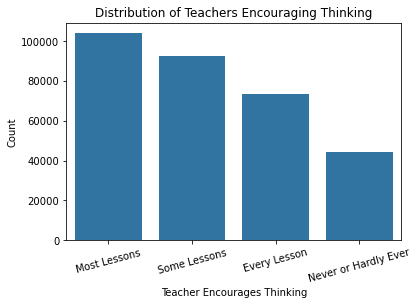

In [63]:
# Plot 13: Bar chart of the teachers encouraging thinking

# Get the descending order of the Teacher_Encourages_Thinking column
gen_order = df_new['Teacher_Encourages_Thinking'].value_counts().index

sb.countplot(data = df_new, x = 'Teacher_Encourages_Thinking', color=base_color, order=gen_order);

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15)

# Set the plot's title and labels
plt.title("Distribution of Teachers Encouraging Thinking")
plt.xlabel("Teacher Encourages Thinking")
plt.ylabel('Count');

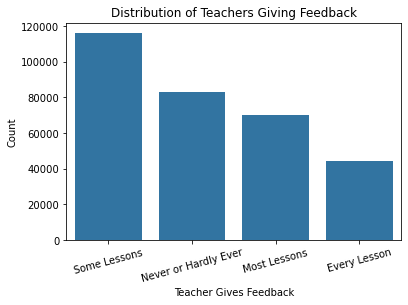

In [64]:
# Plot 14: Bar chart of the teachers giving feedback to the students

# Get the descending order of the Teacher_Gives_Feedback column
gen_order = df_new['Teacher_Gives_Feedback'].value_counts().index

sb.countplot(data = df_new, x = 'Teacher_Gives_Feedback', color=base_color, order=gen_order);

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15)

# Set the plot's title and labels
plt.title("Distribution of Teachers Giving Feedback")
plt.xlabel("Teacher Gives Feedback")
plt.ylabel('Count');

Plots 12-14 show the teachers' practices:

12: Most teachers set the goals in most of the lessons

13: Most teachers encourage thinking in most of the lessons

14: Most teachers give feedback to the students in some of the lessons


Note that these plots may not be 100% accurate since they depend on the students' answers, which may be biased.

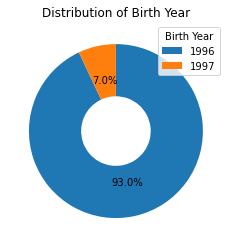

In [135]:
# Plot 15: Donut chart of the birth year

plt.pie(df_new['Birth_Year'].value_counts(), startangle = 90, counterclock = False, autopct='%1.1f%%', wedgeprops = {'width' : 0.6});

# Set the plot's title and legend
plt.title("Distribution of Birth Year")
plt.legend(['1996', '1997'], title = 'Birth Year');

Plot 15 shows that most students were born in 1996, and the minority were born in 1997.

Now we can start plotting the quantitative variables.

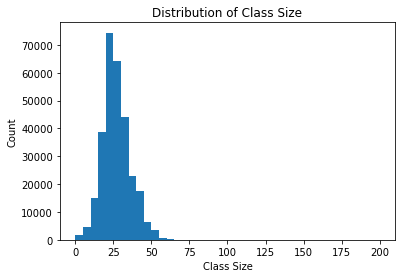

In [66]:
# Plot 16a: Histogram of the class sizes

# Set the bins size
bins = np.arange(0, df_new['Class_Size'].max()+5, 5);

plt.hist(data = df_new, x = 'Class_Size', bins = bins);

# Set the plot's title and labels
plt.title("Distribution of Class Size")
plt.xlabel("Class Size")
plt.ylabel('Count');

In [59]:
df_new.Class_Size.value_counts()

20.0     28247
30.0     24713
25.0     22476
28.0     13499
24.0     13362
         ...  
109.0        1
84.0         1
191.0        1
103.0        1
93.0         1
Name: Class_Size, Length: 108, dtype: int64

Plot 16a shows that there are outliers in the class size till upto 200 students per class. To get a clearer picture of the data, we can change the axis limit, as shown below in plot 16b.

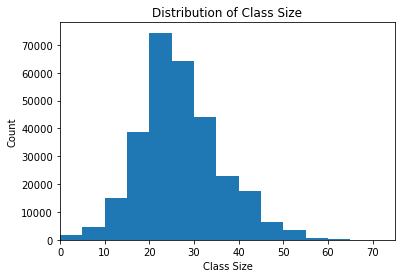

In [67]:
# Plot 16b: Histogram of the class sizes

plt.hist(data = df_new, x = 'Class_Size', bins = bins); 

# Set a limit of 75 to the x-axis so that the class size's trend is shown
plt.xlim((0,75));

# Set the plot's title and labels
plt.title("Distribution of Class Size")
plt.xlabel("Class Size")
plt.ylabel('Count');

The above plot shows a better representation of the class size. We can see that the data is lightly skewed to the right. Most of the class sizes are between around 20 and 25 students.

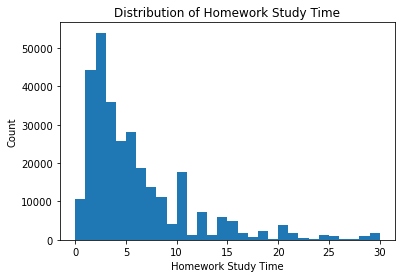

In [68]:
# Plot 17: Histogram of the homework study time

# Set the bins size
bins = np.arange(0, df_new['Homework_Study_Time'].max()+1, 1);

plt.hist(data = df_new, x = 'Homework_Study_Time', bins = bins); 

# Set the plot's title and labels
plt.title("Distribution of Homework Study Time")
plt.xlabel("Homework Study Time")
plt.ylabel('Count');

Plot 17 shows that most students spend 1-3 hours to study outside class for their homework. The data is is highly skewed to the right.

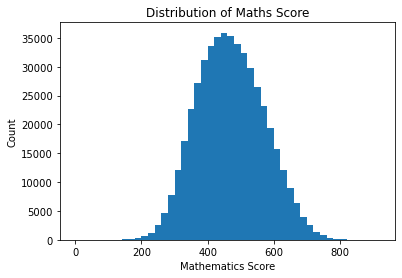

In [69]:
# Plot 18: Histogram of the maths scores

# Set the bins size
bins = np.arange(0, df_new['Maths_Score'].max()+20, 20);

plt.hist(data = df_new, x = 'Maths_Score', bins = bins);  

# Set the plot's title and labels
plt.title("Distribution of Maths Score")
plt.xlabel("Mathematics Score")
plt.ylabel('Count');

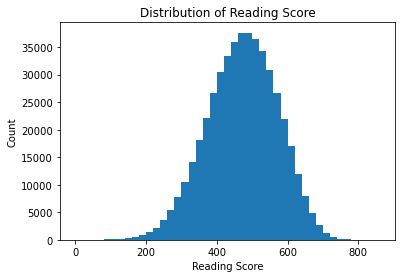

In [70]:
# Plot 19: Histogram of the reading scores

# Set the bins size
bins = np.arange(0, df_new['Reading_Score'].max()+20, 20);

plt.hist(data = df_new, x = 'Reading_Score', bins = bins); 

# Set the plot's title and labels
plt.title("Distribution of Reading Score")
plt.xlabel("Reading Score")
plt.ylabel('Count');

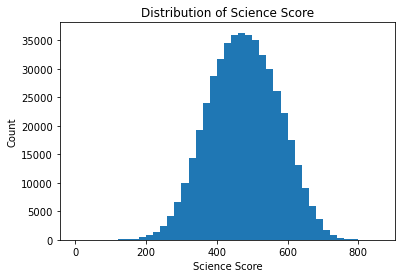

In [71]:
# Plot 20: Histogram of the science scores

# Set the bins size
bins = np.arange(0, df_new['Science_Score'].max()+20, 20);

plt.hist(data = df_new, x = 'Science_Score', bins = bins);

# Set the plot's title and labels
plt.title("Distribution of Science Score")
plt.xlabel("Science Score")
plt.ylabel('Count');

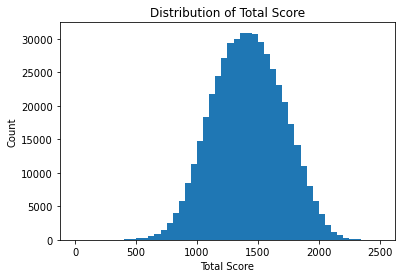

In [72]:
# Plot 21: Histogram of the total scores

# Set the bins size
bins = np.arange(0, df_new['Total_Score'].max()+50, 50);

plt.hist(data = df_new, x = 'Total_Score', bins = bins);

# Set the plot's title and labels
plt.title("Distribution of Total Score")
plt.xlabel("Total Score")
plt.ylabel('Count');

Plots 18-21 show that the maths, reading, science and total scores have a normal distribution. Based on the mean, it shows that the mean of the maths score was slightly less than the reading and science scores. This makes sense because most people struggle with maths.

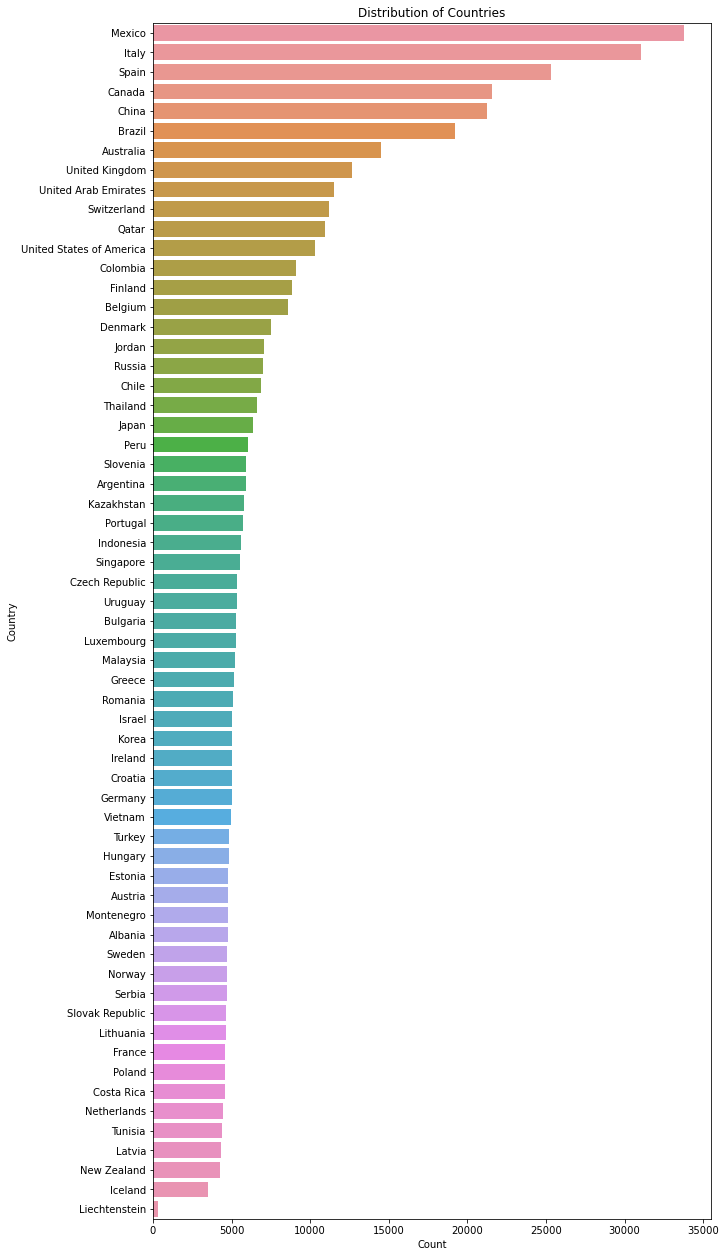

In [73]:
# Plot 22: Bar chart of the countries

# Get the descending order of the Country column
gen_order = df_new['Country'].value_counts().index

# Change the size of the figure to show all the countries clearly
plt.figure(figsize=[10,22])
sb.countplot(data = df_new, y = 'Country', order = gen_order);

# Set the plot's title and labels
plt.title("Distribution of Countries")
plt.ylabel("Country")
plt.xlabel('Count');

Plot 22 shows the number of students in each country. The country with the most students is Mexico, followed by Italy. The country with the lowest number of students is Liechtenstein.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The maths, reading, science & total scores all had a normal distribution. As for the homework study time, the plot was highly skewed to the right. Few students have a study time close to 30, which is a bit unusual or could be a wrong value. I did not perform any transformations as the data was mostly clean.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I did find birth months of 99, which is impossible, so I set that data to null. I also cleaned the format of the Country variable. Furthermore, I made sure the categorical data that had an order were ordered and adjusted some of the responses to be more precise and so that they can be plotted in order.

## Bivariate Exploration

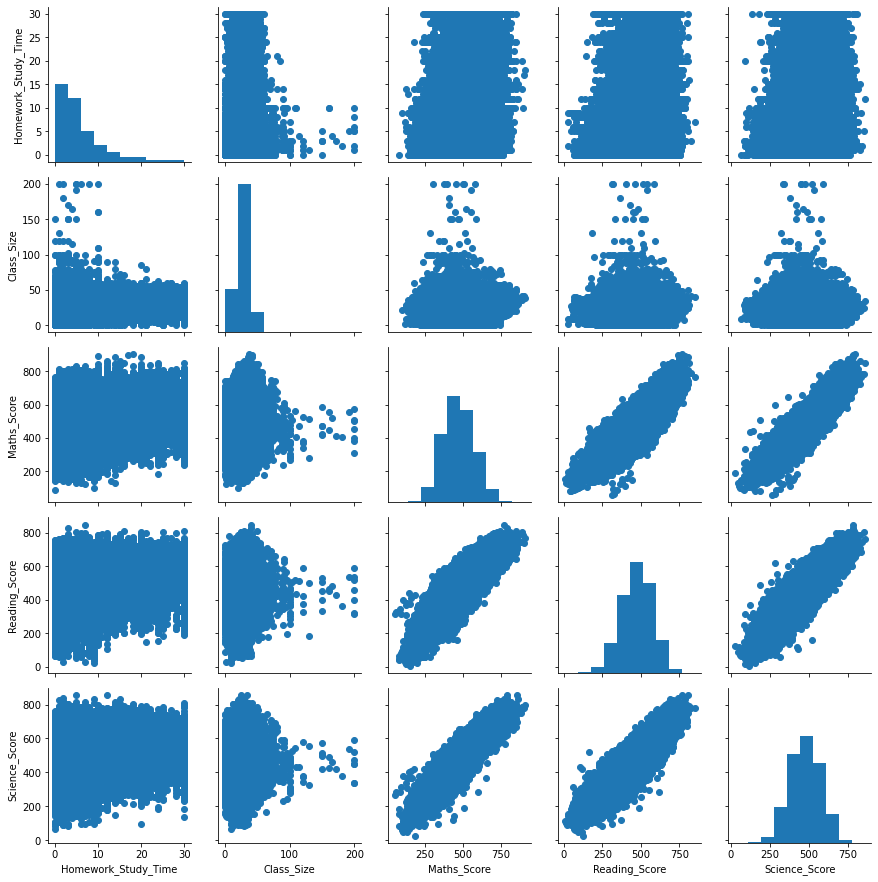

In [82]:
# Plot 1: Initial plot to see if there are any correlations between the quantitative variables

g = sb.PairGrid(data = df_new, vars = ['Homework_Study_Time', 'Class_Size', 'Maths_Score', 'Reading_Score', 'Science_Score']);

# Histogram plots across the diagonal
g.map_diag(plt.hist)

# Scatter plots outside the diagonal
g.map_offdiag(plt.scatter);

Plot 1 shows that there are positive correlations between the reading and science scores, the reading and maths scores, and the science and maths scores. The rest of the scatter plots don't show correlations.

The homework study time and the class size are both skewed to the right, and the maths, reading and science scores have normal distribution.

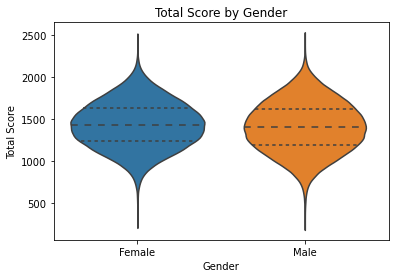

In [87]:
# Plot 2: Relationship between gender and the total score

sb.violinplot(data = df_new, x = 'Gender', y = 'Total_Score', inner = 'quartile');

# Set the plot's title and labels
plt.title("Total Score by Gender")
plt.xlabel("Gender")
plt.ylabel('Total Score');

Plot 2 shows that there is almost no difference between the genders and the scores. The female violin plot is slighly wider than the male's.

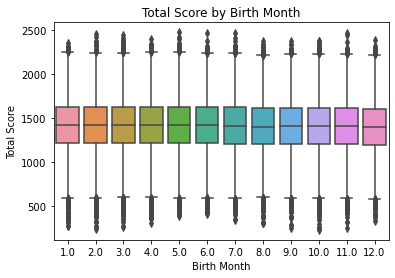

In [88]:
# Plot 3: Relationship between the birth month and the total score

sb.boxplot(data = df_new, x = 'Birth_Month', y = 'Total_Score');

# Set the plot's title and labels
plt.title("Total Score by Birth Month")
plt.xlabel("Birth Month")
plt.ylabel('Total Score');

Plot 3 shows that the birth month doesn't affect the total score, which was an expected result.

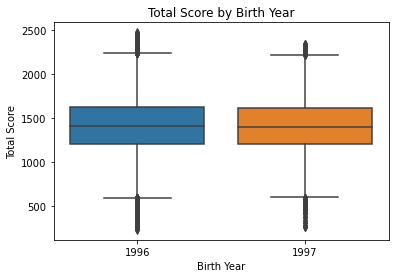

In [89]:
# Plot 4: Relationship between the birth year and the total score

sb.boxplot(data = df_new, x = 'Birth_Year', y = 'Total_Score');

# Set the plot's title and labels
plt.title("Total Score by Birth Year")
plt.xlabel("Birth Year")
plt.ylabel('Total Score');

Plot 4 shows that 1996 have slightly higher scores, but this could be because the majority of the students were born in 1996 (93%).

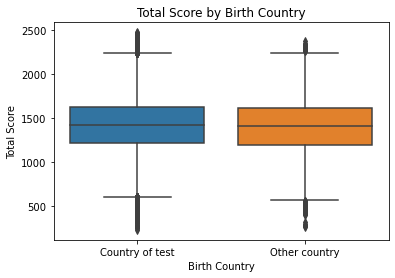

In [90]:
# Plot 5: Relationship between the birth country and the total score

sb.boxplot(data = df_new, x = 'Birth_Country', y = 'Total_Score');

# Set the plot's title and labels
plt.title("Total Score by Birth Country")
plt.xlabel("Birth Country")
plt.ylabel('Total Score');

Again, plot 5 shows no significant difference between the birth countries and the scores. 

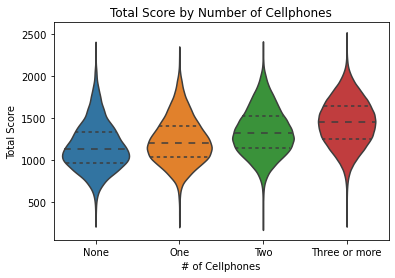

In [91]:
# Plot 6: Relationship between the number of cellphones and the total score

sb.violinplot(data = df_new, x = 'No_Cellphones', y = 'Total_Score', inner = 'quartile');

# Set the plot's title and labels
plt.title("Total Score by Number of Cellphones")
plt.xlabel("# of Cellphones")
plt.ylabel('Total Score');

Plot 6 shows a positive correlation between the number of cellphones and the total score. As the number of cellphone increases, the total score increases.

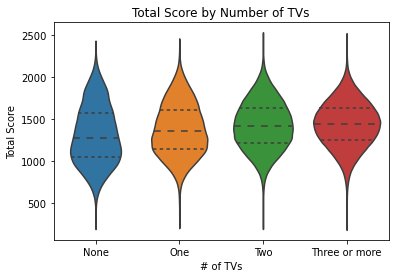

In [92]:
# Plot 7: Relationship between the number of TVs and the total score

sb.violinplot(data = df_new, x = 'No_TVs', y = 'Total_Score', inner = 'quartile');

# Set the plot's title and labels
plt.title("Total Score by Number of TVs")
plt.xlabel("# of TVs")
plt.ylabel('Total Score');

Plot 7 also shows a positive correlation between the number of TVs and the total score.

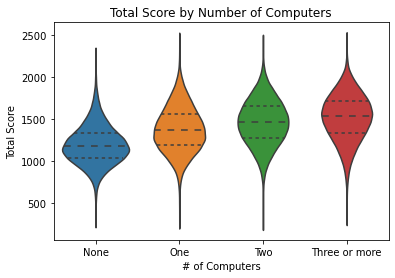

In [93]:
# Plot 8: Relationship between the number of computers and the total score

sb.violinplot(data = df_new, x = 'No_Computers', y = 'Total_Score', inner = 'quartile');

# Set the plot's title and labels
plt.title("Total Score by Number of Computers")
plt.xlabel("# of Computers")
plt.ylabel('Total Score');

Plot 8 illustrates that the more computers a student owns, the higher the chance of getting a higher score.

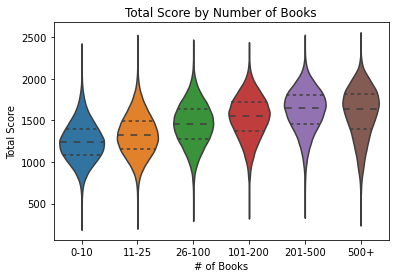

In [94]:
# Plot 9: Relationship between the number of computers and the total score

sb.violinplot(data = df_new, x = 'No_Books', y = 'Total_Score', inner = 'quartile');

# Set the plot's title and labels
plt.title("Total Score by Number of Books")
plt.xlabel("# of Books")
plt.ylabel('Total Score');

Plot 9 also shows that the more books a student owns, the higher the chance of getting a higher score.

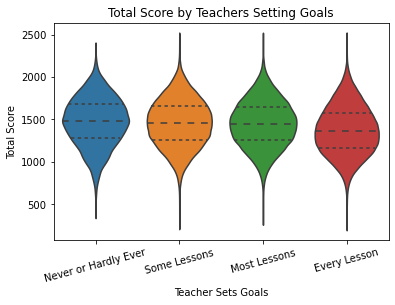

In [95]:
# Plot 10: Relationship between the teachers setting goals and the total score

sb.violinplot(data = df_new, x = 'Teacher_Sets_Goals', y = 'Total_Score', inner = 'quartile');

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15);

# Set the plot's title and labels
plt.title("Total Score by Teachers Setting Goals")
plt.xlabel("Teacher Sets Goals")
plt.ylabel('Total Score');

Plot 10 showed interesting results. Teachers that set goals for their students in every lesson resulted in their students getting a lower mean score. 

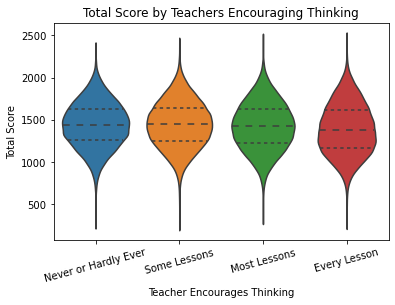

In [96]:
# Plot 11: Relationship between the teachers encouraging thinking and the total score

sb.violinplot(data = df_new, x = 'Teacher_Encourages_Thinking', y = 'Total_Score', inner = 'quartile');

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15);

# Set the plot's title and labels
plt.title("Total Score by Teachers Encouraging Thinking")
plt.xlabel("Teacher Encourages Thinking")
plt.ylabel('Total Score');

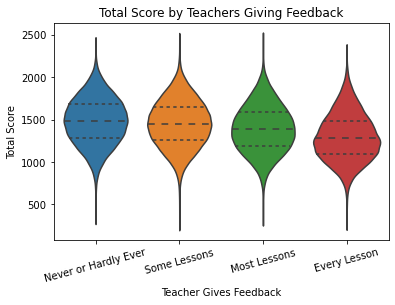

In [97]:
# Plot 12: Relationship between the teachers giving feedback and the total score

sb.violinplot(data = df_new, x = 'Teacher_Gives_Feedback', y = 'Total_Score', inner = 'quartile');

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15);

# Set the plot's title and labels
plt.title("Total Score by Teachers Giving Feedback")
plt.xlabel("Teacher Gives Feedback")
plt.ylabel('Total Score');

Plots 11 and 12 also showed that teachers who give feedback and encourage thinking in every lesson result in students having a lower mean total score.

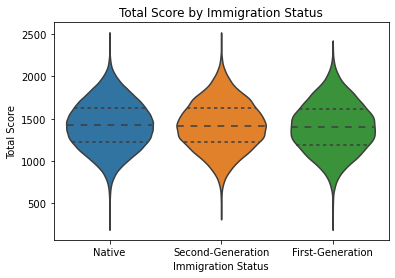

In [98]:
# Plot 13: Relationship between the immigration status and the total score

sb.violinplot(data = df_new, x = 'Immigration_Status', y = 'Total_Score', inner = 'quartile');

# Set the plot's title and labels
plt.title("Total Score by Immigration Status")
plt.xlabel("Immigration Status")
plt.ylabel('Total Score');

Plot 13 illustrates that there isn't a difference in the total score based on the immigration status of the students.

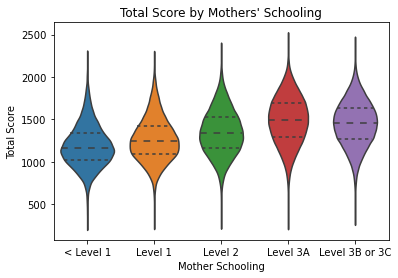

In [99]:
# Plot 14: Relationship between the mother schooling and the total score

sb.violinplot(data = df_new, x = 'Mother_Schooling', y = 'Total_Score', inner = 'quartile');

# Set the plot's title and labels
plt.title("Total Score by Mothers' Schooling")
plt.xlabel("Mother Schooling")
plt.ylabel('Total Score');

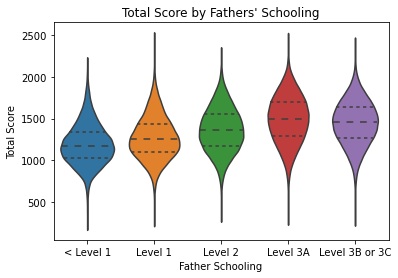

In [100]:
# Plot 15: Relationship between the father schooling and the total score

sb.violinplot(data = df_new, x = 'Father_Schooling', y = 'Total_Score', inner = 'quartile');

# Set the plot's title and labels
plt.title("Total Score by Fathers' Schooling")
plt.xlabel("Father Schooling")
plt.ylabel('Total Score');

Based on plots 14 and 15, it shows that the higher the parents' schooling, the higher the chance of getting a higher score mean. However, level 3A in both plots have the highest mean score.

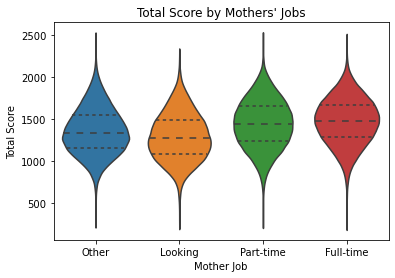

In [101]:
# Plot 16: Relationship between the mother's job and the total score

sb.violinplot(data = df_new, x = 'Mother_Job', y = 'Total_Score', inner = 'quartile');

# Set the plot's title and labels
plt.title("Total Score by Mothers' Jobs")
plt.xlabel("Mother Job")
plt.ylabel('Total Score');

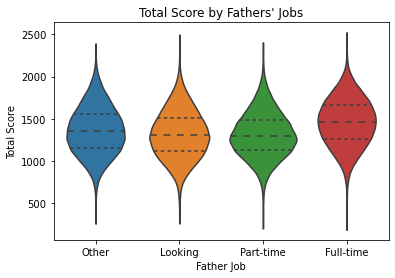

In [102]:
# Plot 17: Relationship between the father's job and the total score

sb.violinplot(data = df_new, x = 'Father_Job', y = 'Total_Score', inner = 'quartile');

# Set the plot's title and labels
plt.title("Total Score by Fathers' Jobs")
plt.xlabel("Father Job")
plt.ylabel('Total Score');

Plots 16 and 17 show that the highest mean score was obtained when the parents had a full-time job. This makes sense because it means the household has a stable income.

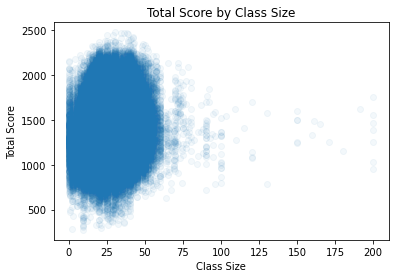

In [103]:
# Plot 18a: Relationship between the class size and the total score

# Add transparency to the scatter plot to better show the trend and find outliers
plt.scatter(data = df_new, x = 'Class_Size', y = 'Total_Score', alpha = 1/20);

# Set the plot's title and labels
plt.title("Total Score by Class Size")
plt.ylabel('Total Score')
plt.xlabel('Class Size');

It is difficult to see the relationship based on the scatterplot in plot 18a because of the many overlapping points. Even after applying transparency, the relationship is still unclear. However, it still shows that any class size upto around 70 students will have a chance of getting a high mean of the total score.

Next I will try plotting the same relationship over a line plot.

In [85]:
# Get the min and max values of the class size to divide them into bins

df_new['Class_Size'].describe()

count    294163.000000
mean         26.017759
std           9.223134
min           0.000000
25%          20.000000
50%          25.000000
75%          30.000000
max         200.000000
Name: Class_Size, dtype: float64

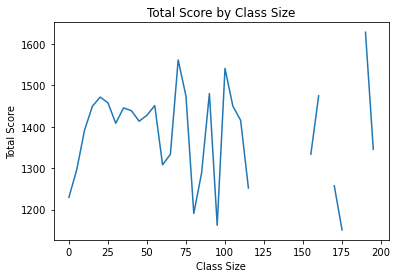

In [104]:
# Plot 18b: Relationship between the class size and the total score

# Use the min and max values of the Class_Size column to set the bin edges and compute the center of each bin
bin_edges = np.arange(0, 200+5, 5)
bin_centers = bin_edges[:-1] + 0.1

# Cut the bin values into discrete intervals. Returns a Series object
class_bin = pd.cut(df_new['Class_Size'], bin_edges, include_lowest = True)
class_mean = df_new['Total_Score'].groupby(class_bin).mean()
class_std = df_new['Total_Score'].groupby(class_bin).std()

# Plot the summarized data
plt.errorbar(x = bin_centers, y = class_mean)

# Set the plot's title and labels
plt.title("Total Score by Class Size")
plt.ylabel('Total Score')
plt.xlabel('Class Size');

There are many gaps in the line plot. This line plot doesn't lead to any conclusion since there isn't a trend.

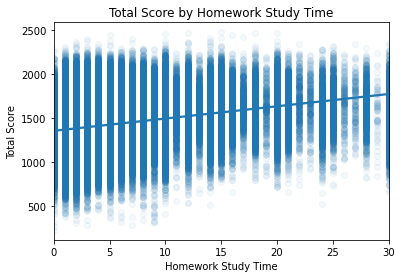

In [105]:
# Plot 19a: Relationship between the homework study time and the total score

# Add transparency to the scatter plot to better show the trend and find outliers
sb.regplot(data = df_new, x = 'Homework_Study_Time', y = 'Total_Score', scatter_kws = {'alpha' : 1/20});

# Set the plot's title and labels
plt.title("Total Score by Homework Study Time")
plt.ylabel('Total Score')
plt.xlabel('Homework Study Time');

Based on plot 19, the higher the study time, the higher the total score mean. However, the increase of the score is not very significant in this plot. Therefore, I will plot it using a line plot.

In [88]:
# Get the min and max values of the homework study time to divide them into bins

df_new['Homework_Study_Time'].describe()

count    301367.000000
mean          5.493770
std           5.383815
min           0.000000
25%           2.000000
50%           4.000000
75%           7.000000
max          30.000000
Name: Homework_Study_Time, dtype: float64

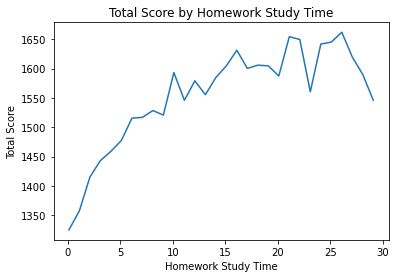

In [106]:
# Plot 19b: Relationship between the homework study time and the total score

# Use the min and max values of the Class_Size column to set the bin edges and compute the center of each bin
bin_edges = np.arange(0, 30+1, 1)
bin_centers = bin_edges[:-1] + 0.1

# Cut the bin values into discrete intervals. Returns a Series object
study_bin = pd.cut(df_new['Homework_Study_Time'], bin_edges, include_lowest = True)
study_mean = df_new['Total_Score'].groupby(study_bin).mean()
study_std = df_new['Total_Score'].groupby(study_bin).std()

# Plot the summarized data
plt.errorbar(x = bin_centers, y = study_mean)

# Set the plot's title and labels
plt.title("Total Score by Homework Study Time")
plt.ylabel('Total Score')
plt.xlabel('Homework Study Time');

Plot 19b shows a clearer representation than 19a of the linear relationship between the homework study time and the average total score. As the homework study time increases, the average total score is expected to increase. This relationship makes sense because when a student puts more time into studying, it should result in them getting higher scores.

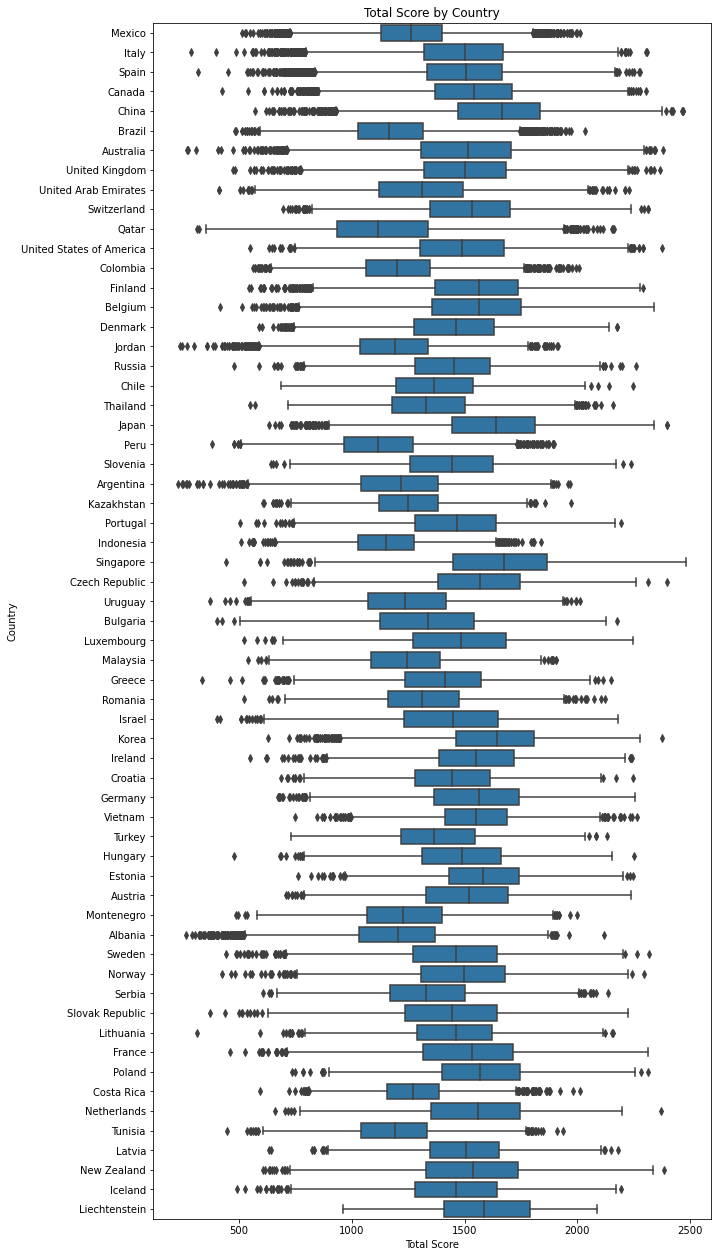

In [107]:
# Plot 20: Relationship between the country and the total score

# Get the descending order of the Country column and store it in gen_order
gen_order = df_new['Country'].value_counts().index

# Change the figure size to show all the countries clearly
plt.figure(figsize=[10,22])

sb.boxplot(data = df_new, x = 'Total_Score', y = 'Country', order = gen_order, color = base_color);

# Set the plot's title and labels
plt.title("Total Score by Country")
plt.ylabel("Country")
plt.xlabel('Total Score');

Plot 20 didn't result in any conclusions. China seems to have the largest average total score. However, this doesn't mean that being Chinese will result in a student getting a higher score. 

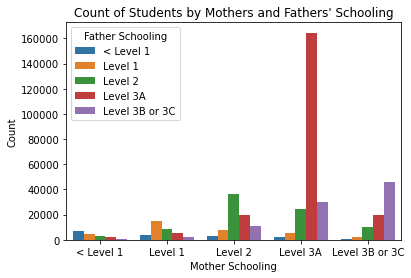

In [109]:
# Plot 21: Relationship between the mothers and fathers' schooling:

sb.countplot(data = df_new, x = 'Mother_Schooling', hue = 'Father_Schooling');

# Set the plot's title, labels and legend title
plt.title("Count of Students by Mothers and Fathers' Schooling")
plt.ylabel('Count')
plt.xlabel('Mother Schooling')
plt.legend(title = "Father Schooling");

Plot 21 shows that the majority of parents both finished level 3A schooling.

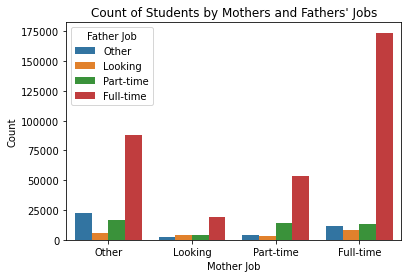

In [110]:
# Plot 22: Relationship between the mothers and fathers' jobs:

sb.countplot(data = df_new, x = 'Mother_Job', hue = 'Father_Job');

# Set the plot's title, labels and legend title
plt.title("Count of Students by Mothers and Fathers' Jobs")
plt.ylabel('Count')
plt.xlabel('Mother Job')
plt.legend(title = "Father Job");

Plot 22 shows that most mothers and fathers have full-time jobs.

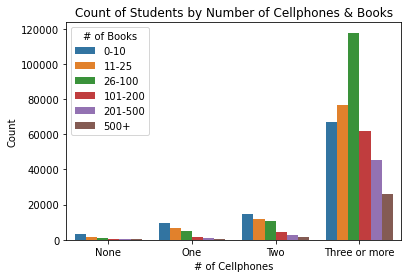

In [112]:
# Plot 23: Relationship between the number of cellphones and books:

sb.countplot(data = df_new, x = 'No_Cellphones', hue = 'No_Books');

# Set the plot's title, labels and legend title
plt.title("Count of Students by Number of Cellphones & Books")
plt.ylabel('Count')
plt.xlabel('# of Cellphones')
plt.legend(title="# of Books");

I expected the highest number of books to be with the least number of cellphones. However, plot 23 shows that most students who had 500+ books were the ones who had three or more cellphones. The majority of students have three or more cellphones and 26-100 books.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I first plotted some of the quantitative variables in a pair grid plot to see if there are any obvious relationships between any of them. However, the plot lead to no conclusions, except for that the homework study time and the class size are both skewed to the right, while the maths, reading and science scores have normal distributions.

> After that, I tried to plot all the variables against the total score to see if there are any correlations between them and the score and got the following conclusions:

>    1) The average total score didn't change when they were plotted against these variables: gender, birth month, birth year, birth country and immigration status.

>    2) There was a relationship between the average total score and the following variables: number of cellphones, TVs, computers & books, the parents' schooling, the parents' jobs and the homework study time.

>    3) When the country was plotted against the total score, each country had a different average score, but it didn't lead to any conclusion.

>    4) When the class size was plotted against the total score, there were no trends.

>    5) When the teachers set goals, teachers encourage thinking and teachers give feedback were seperately plotted against the total score, it lead to interesting results. I was expecting students with the highest scores to be in the case of the teacher doing these practices consistently in every lesson. However, teachers who did these practices in every lesson resulted in the lowest average total grade. It might not be the cause of the teachers, but it was still opposite of what I was expecting the results to be. 



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed the relationship between the mothers and fathers' schooling, and the plot showed that the majority of both parents finished level 3A schooling.

> I then observed the relationship between the parents' jobs, and reached the conclusion that most parents have full-time jobs.

> Finally, I plotted the number of books vs. the number of cellphones, and it turns out that most students own three or more cellphones, and of those students, the majority own 26-100 books.

## Multivariate Exploration

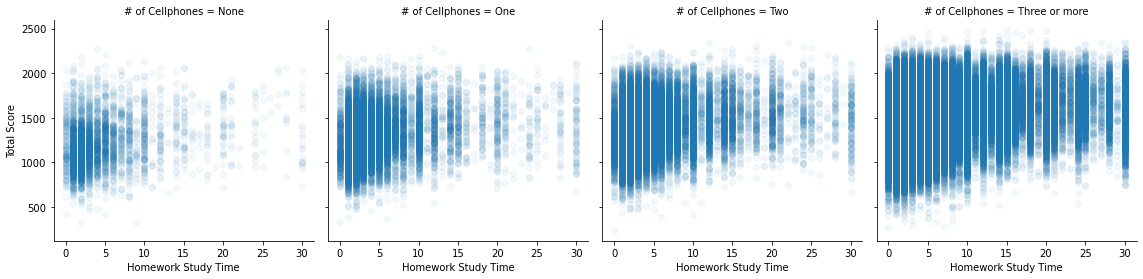

In [128]:
# Plot 1: Plotting the homework study time vs. the total score based on the number of cellphones

g = sb.FacetGrid(data = df_new, col = 'No_Cellphones', height = 4)
g.map(plt.scatter, 'Homework_Study_Time', 'Total_Score', alpha = 1/20);

# Set the column titles and the labels
g.set_titles(col_template="# of Cellphones = {col_name}", row_template="{row_name}")
g.set_axis_labels("Homework Study Time", "Total Score");

Since there seemed to be a relationship between the total score and each of the number of cellphones and homework study time, I decided to plot these three variables in one plot. Plot 1 shows that the higher the number of cellphones a student has, the higher the probability of them studying for longer hours and getting higher scores. However, that doesn't mean that if a student has three or more cellphones that they will get higher scores.

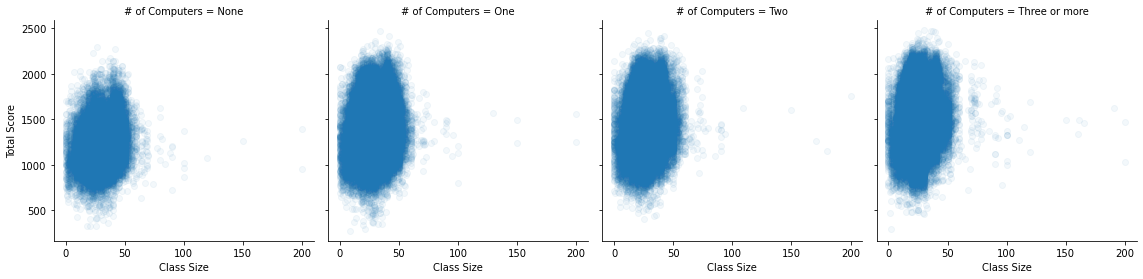

In [127]:
# Plot 2: Plotting the class size vs. the total score based on the number of computers

g = sb.FacetGrid(data = df_new, col = 'No_Computers', height = 4)
g.map(plt.scatter, 'Class_Size', 'Total_Score', alpha = 1/20);

# Set the column titles and the labels
g.set_titles(col_template="# of Computers = {col_name}", row_template="{row_name}")
g.set_axis_labels("Class Size", "Total Score");

Even though there didn't seem to be a relationship between the class size and the total score (back in the bivariate exploration), I wanted to see its effect if plotted against two other variables. Plot 2 shows that the class size doesn't really differ based on the number of computers. We can see a slight increase in the total scores between having no computers and having one or more computer.

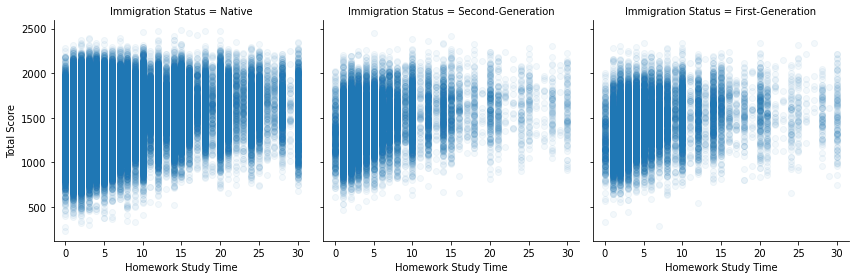

In [125]:
# Plot 3: Plotting the homework study time vs. the total score based on the immigration status

g = sb.FacetGrid(data = df_new, col = 'Immigration_Status', height = 4)
g.map(plt.scatter, 'Homework_Study_Time', 'Total_Score', alpha = 1/20);

# Set the column titles and the labels
g.set_titles(col_template="Immigration Status = {col_name}", row_template="{row_name}")
g.set_axis_labels("Homework Study Time", "Total Score");

Plot 3 shows that it doesn't matter in terms of the total score what the student's immigration status is. Since the majority of students were native, this plot doesn't conclude to anything. The second-generation and first-generation students mostly lie between 0 to 15 hours of homework study, while the native students could be studying from 0 to 30 hours.

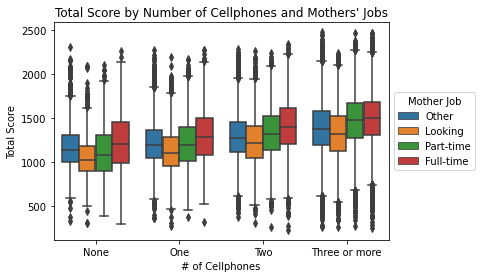

In [116]:
# Plot 4: Plotting the number of cellphones vs. the total score based on the mother's job

sb.boxplot(data = df_new, x = 'No_Cellphones', y = 'Total_Score', hue = 'Mother_Job');

# Bring the legend to the side and set the legend's title
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5), title = "Mother Job");

# Set the plot's title and labels
plt.title("Total Score by Number of Cellphones and Mothers' Jobs")
plt.ylabel('Total Score')
plt.xlabel('# of Cellphones');

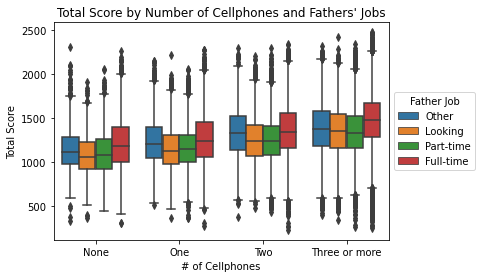

In [117]:
# Plot 5: Plotting the number of cellphones vs. the total score based on the father's job

sb.boxplot(data = df_new, x = 'No_Cellphones', y = 'Total_Score', hue = 'Father_Job');

# Bring the legend to the side and set the legend's title
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5), title = "Father Job");

# Set the plot's title and labels
plt.title("Total Score by Number of Cellphones and Fathers' Jobs")
plt.ylabel('Total Score')
plt.xlabel('# of Cellphones');

In plots 4 and 5, it is shown that the students with the highest scores were when they had three or more cellphones and both their parents had full-time jobs.

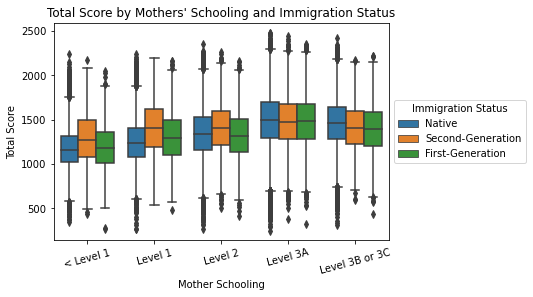

In [118]:
# Plot 6: Plotting the mother schooling vs the total score based on the immigration status

sb.boxplot(data = df_new, x = 'Mother_Schooling', y = 'Total_Score', hue = 'Immigration_Status');

# Bring the legend to the side and set the legend's title
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5), title = "Immigration Status")

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15);

# Set the plot's title and labels
plt.title("Total Score by Mothers' Schooling and Immigration Status")
plt.ylabel('Total Score')
plt.xlabel('Mother Schooling');

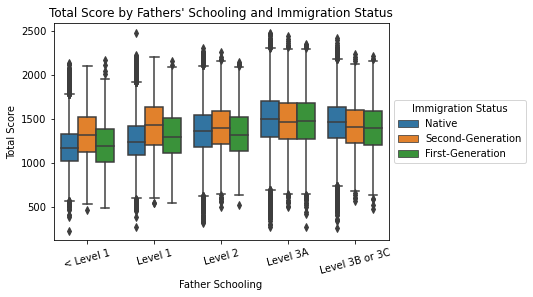

In [119]:
# Plot 7: Plotting the father schooling vs the total score based on the immigration status

sb.boxplot(data = df_new, x = 'Father_Schooling', y = 'Total_Score', hue = 'Immigration_Status');

# Bring the legend to the side and set the legend's title
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5), title = "Immigration Status")

# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15);

# Set the plot's title and labels
plt.title("Total Score by Fathers' Schooling and Immigration Status")
plt.ylabel('Total Score')
plt.xlabel('Father Schooling');

Plots 6 & 7 show that for the parents' schooling, if their level was 2 or below, the second-generation students had the highest scores. However, if the schooling was level 3A or aboce, the native students had the highest scores.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Before starting this study, I thought the features that would affect the total scores the most were the teachers' influences, the students' immigration status, the class size, and the parents' highest schooling. However, almost none of my assumptions were correct once I started to see the relationships of the variables with the total scores and with other variables.

> The number of cellphones, TVs, computers & books, the parents' schooling & jobs, and the homework study time were the variables that affected the total scores.

> The higher the number of cellphones, TVs, computers and books, the higher the chances of getting a better total score. This could be because the family's social status was better, and therefore provided better support for the students.

> As long as the parents' schooling was level 3A or higher, there is a good chance that the students would get higher grades. Furthermore, parents who had full-time jobs resulted in their children getting higher scores. This could be because having role models to look up to will make you work harder and believe in yourself more.

> Finally, students who studied for longer hours had a higher chance of scoring better.

### Were there any interesting or surprising interactions between features?

> I was expecting the class size and the teachers' influences to have an effect on the scores, but I was surprized with the results. Teachers who showed interest in every class had students with a lower total score than the rest. Moreover, there was no correlation between the class size and the total scores.

In [101]:
df_new.to_csv(r'df.csv', index = False)